# Basic Artificial Neural Networks in Python

# COURSERA

In [32]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Generating a Sample Dataset

In [50]:
np.random.seed(0)

In [51]:
feature_set,labels = datasets.make_moons(100,noise=0.1)

In [52]:
feature_set.shape

(100, 2)

In [53]:
labels.shape

(100,)

In [54]:
feature_set[:5]

array([[-0.05348369,  0.99258199],
       [ 1.81989987, -0.17559999],
       [ 0.95535658,  0.05999942],
       [ 0.01558147,  0.11081703],
       [ 0.96454939, -0.51276464]])

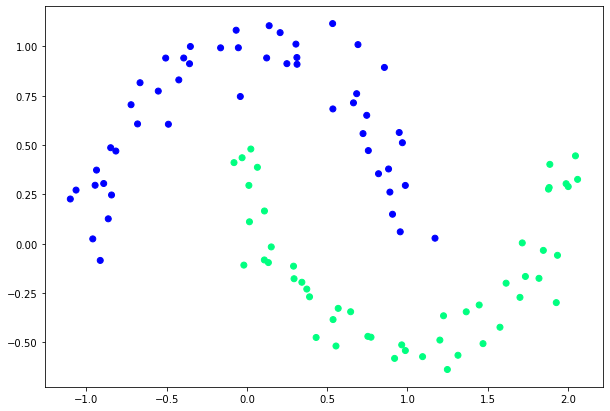

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0],feature_set[:,1],c=labels,cmap=plt.cm.winter)
labels=labels.reshape(100,1)
plt.show()

In [56]:
feature_set.shape

(100, 2)

# Implementing Feedforward and an Activation Function

In [57]:
def sigmoid(x):
    return 1/(1+np.exp(-x))    

In [58]:
len(feature_set[0])

2

In [61]:
wh = np.random.rand(len(feature_set[0]),4) # 4 is the numer of nodes

In [62]:
wh

array([[0.78854551, 0.05684808, 0.69699724, 0.7786954 ],
       [0.77740756, 0.25942256, 0.37381314, 0.58759964]])

In [63]:
w0 = np.random.rand(4,1)
lr = 0.5

# Implementing Feedforward for Multiple Hidden Layers

In [64]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [76]:
zh=np.dot(feature_set,wh)
zh.shape

(100, 4)

In [77]:
ah=sigmoid(zh) 
ah.shape

(100, 4)

In [78]:
costPlot

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
nEpochs = 2000
costPlot = []#np.zeros(nEpochs)

for epoch in range(nEpochs):
    # Feed forward propagation
    zh=np.dot(feature_set,wh) # Dot product of features data set and hidden layers
    ah=sigmoid(zh)         # sigmoid of Dot product of features data set and hidden layers
    
    z0=np.dot(ah,w0)       # Dot product of output weights and the sigmoid
    a0=sigmoid(z0)
    # Implementing Backpropagation, Cost Function and Training
    
    # Phase 1
    error_out = ((1/2)*(np.power((a0-labels),2))) #loss
    #if (epoch % 10 == 0):
    #    print("Epoch", epoch, "cost: ", error_out)
    costPlot[epoch] = error_out
    #print(error_out.sum())
    
    dcost_da0=a0-labels     # Derivate cost equal sigmoid of Dot product of output weights and the sigmoid
                            # of Dot product of features data set and hidden layers
    da0_dz0=sigmoid_der(z0) # Sigmoid derivate of output
    dz0_dw0=ah
    dcost_w0=np.dot(dz0_dw0.T,dcost_da0*da0_dz0)
    
    # Phase 2
    dcost_dz0 = dcost_da0*da0_dz0
    dz0_dah = w0
    dcost_dah = np.dot(dcost_dz0,dz0_dah.T)
    
    dah_dzh=sigmoid_der(zh)
    dzh_dwh=feature_set
    dcost_wh=np.dot(dzh_dwh.T,dah_dzh*dcost_dah)
    # Update weights
    wh -=lr*dcost_wh
    w0 -=lr*dcost_w0

plt.plot(costPlot)

In [59]:
for epoch in range(5):
    # Feed forward propagation
    zh=np.dot(feature_set,wh) # Dot product of features data set and hidden layers
    ah=sigmoid(zh)         # sigmoid of Dot product of features data set and hidden layers
    
    z0=np.dot(ah,w0)       # Dot product of output weights and the sigmoid
    a0=sigmoid(z0)
    # Implementing Backpropagation, Cost Function and Training
    
    # Phase 1
    error_out = ((1/2)*(np.power((a0-labels),2))) #loss
    print(error_out.sum())
    
    dcost_da0=a0-labels     # Derivate cost equal sigmoid of Dot product of output weights and the sigmoid
                            # of Dot product of features data set and hidden layers
    da0_dz0=sigmoid_der(z0) # Sigmoid derivate of output
    dz0_dw0=ah
    dcost_w0=np.dot(dz0_dw0.T,dcost_da0*da0_dz0)
    
    # Phase 2
    dcost_dz0 = dcost_da0*da0_dz0
    dz0_dah = w0
    dcost_dah = np.dot(dcost_dz0,dz0_dah.T)
    
    dah_dzh=sigmoid_der(zh)
    dzh_dwh=feature_set
    dcost_wh=np.dot(dzh_dwh.T,dah_dzh*dcost_dah)
    # Update weights
    wh -=lr*dcost_wh
    w0 -=lr*dcost_w0
    

1.6387052921115264
1.6428584792111518
1.6386924494178414
1.6428457518908899
1.6386796084853321


In [25]:
zh=np.dot(feature_set,wh) # Dot product of features data set and hidden layers
ah=sigmoid(zh)         # sigmoid of Dot product of features data set and hidden layers
print(feature_set)    

[[-0.05348369  0.99258199]
 [ 1.81989987 -0.17559999]
 [ 0.95535658  0.05999942]
 [ 0.01558147  0.11081703]
 [ 0.96454939 -0.51276464]
 [ 1.98889686  0.30384984]
 [ 0.53549261  0.68257563]
 [ 0.92004283 -0.58127765]
 [ 0.01206304  0.29518806]
 [ 1.88346177  0.28446179]
 [-0.08064949  0.41062938]
 [ 1.93512761 -0.05897236]
 [ 1.31504601 -0.56540653]
 [ 0.85667004  0.89282872]
 [ 0.75641531  0.4715998 ]
 [-0.35242078  0.99888439]
 [ 0.20681479  1.06917351]
 [ 0.12280354  0.94090393]
 [-0.42463668  0.82968195]
 [ 0.96867858  0.51144583]
 [-0.81695256  0.4692567 ]
 [ 0.34228955 -0.19550647]
 [ 0.88254314  0.37839804]
 [ 0.75337171 -0.46959342]
 [-0.86421327  0.12595569]
 [-0.91417342 -0.08494092]
 [ 0.81989526  0.35435414]
 [ 2.06045723  0.32569418]
 [ 1.61496097 -0.20024177]
 [ 1.22516082 -0.36530949]
 [ 0.29040666 -0.11399058]
 [ 1.24895872 -0.6375463 ]
 [ 1.84706118 -0.03404951]
 [ 0.53663514 -0.38453542]
 [ 0.0242806   0.47944808]
 [-0.1641747   0.99217162]
 [ 0.3112303   0.94315139]
 